In [28]:
#
## Source data
## Taken from https://github.com/udacity/CarND-Advanced-Lane-Lines
#
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from glob import glob

data_path = "../CarND-Advanced-Lane-Lines/"
data = {
    'calibrate': glob(data_path+"camera_cal/*"),
    'test': glob(data_path+"test_images/*.jpg"),
    'video': glob(data_path+"*.mp4")
}

print("Found {} calibration images, {} test images, and {} videos".format(
     len(data['calibrate']), len(data['test']), len(data['video'])))



Found 20 calibration images, 8 test images, and 3 videos


Here are 8 of our calibration images


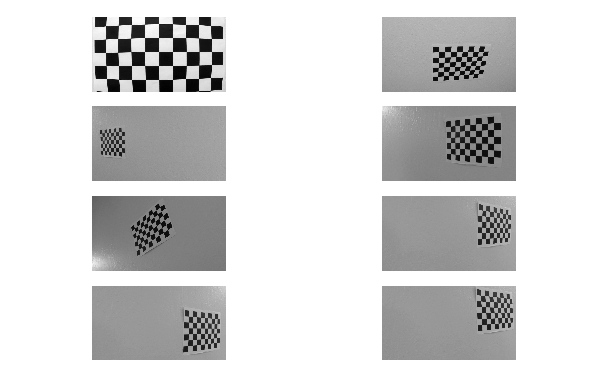

In [2]:
## Showcase our calibration images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

print("Here are 8 of our calibration images")
%matplotlib inline
fig = plt.figure()
plt.axis('off')
fig.tight_layout()
for i in range(0, 2):
    for j in range(0, 4):
        n = i*4+j
        ax = fig.add_subplot(4, 2, n+1)
        plt.axis('off')
        img = cv2.imread(data['calibrate'][n])
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        plt.imshow(gray, cmap='gray')



In [29]:
#
## Map points in the image to points in the real world
## using canonical chessboard images.  We loop through a set
## of images and try to find the grid in each, then keep
## these points around for calibration.
#
import numpy as np
import cv2

cbase = "./calibration/"

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Step through the list and search for chessboard corners
found = 0
for fname in data['calibrate']:
    print("Testing "+os.path.basename(fname))
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (8,6), None)

    # If found, add object points, image points
    if ret == True:
        print("... found corners")
        objpoints.append(objp)
        imgpoints.append(corners)
        cv2.drawChessboardCorners(img, (8,6), corners, ret)
        write_name = cbase+'corners_found'+str(found)+'.jpg'
        cv2.imwrite(write_name, img)
        found += 1

print("We found corners in {} images".format(found))

Testing calibration1.jpg
Testing calibration10.jpg
Testing calibration11.jpg
Testing calibration12.jpg
Testing calibration13.jpg
Testing calibration14.jpg
... found corners
Testing calibration15.jpg
Testing calibration16.jpg
Testing calibration17.jpg
Testing calibration18.jpg
Testing calibration19.jpg
Testing calibration2.jpg
... found corners
Testing calibration20.jpg
Testing calibration3.jpg
Testing calibration4.jpg
Testing calibration5.jpg
Testing calibration6.jpg
Testing calibration7.jpg
Testing calibration8.jpg
Testing calibration9.jpg
We found corners in 2 images


In [30]:
def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color  
    #print(vertices, ignore_mask_color)
    cv2.fillConvexPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def clip_bottom(img):
    vertices = np.int32([[[60,0], [1179,0], [1179,650], [60,650]]])
    return region_of_interest(img, vertices)

def lane_region(img):
    #print("img shape ", img.shape)
    #vertices = np.int32([[[0, 0], [1279,0], [1279,360], [979,719],
                  # [299,719], [0, 360], [0,0]]])
    vertices = np.int32([[[640, 425], [1179,550], [979,719],
                   [299,719], [100, 550], [640, 425]]])
    #np.array([[(dx,ysize), (center-2, dy), (center+2,dy), (xsize-dx, ysize)]], dtype=np.int32)
    #vertices = np.int32([[[0, 0], [0,1279], [524,1279], [719,979],
                   #[719,299], [524,0]]])
    return region_of_interest(img, vertices)

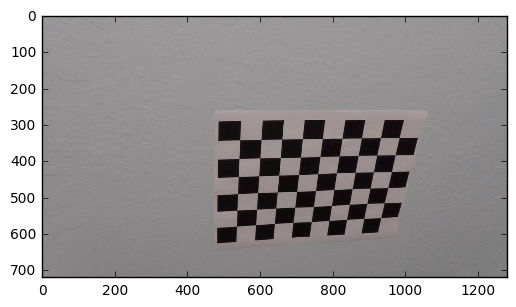

In [33]:
#
## Test undistortion on an image
#
import random

img = cv2.imread(random.choice(data['calibrate']))
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

dst = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(dst)
#cv2.imwrite(cpath+'/calibration_wide/test_undist.jpg',dst)

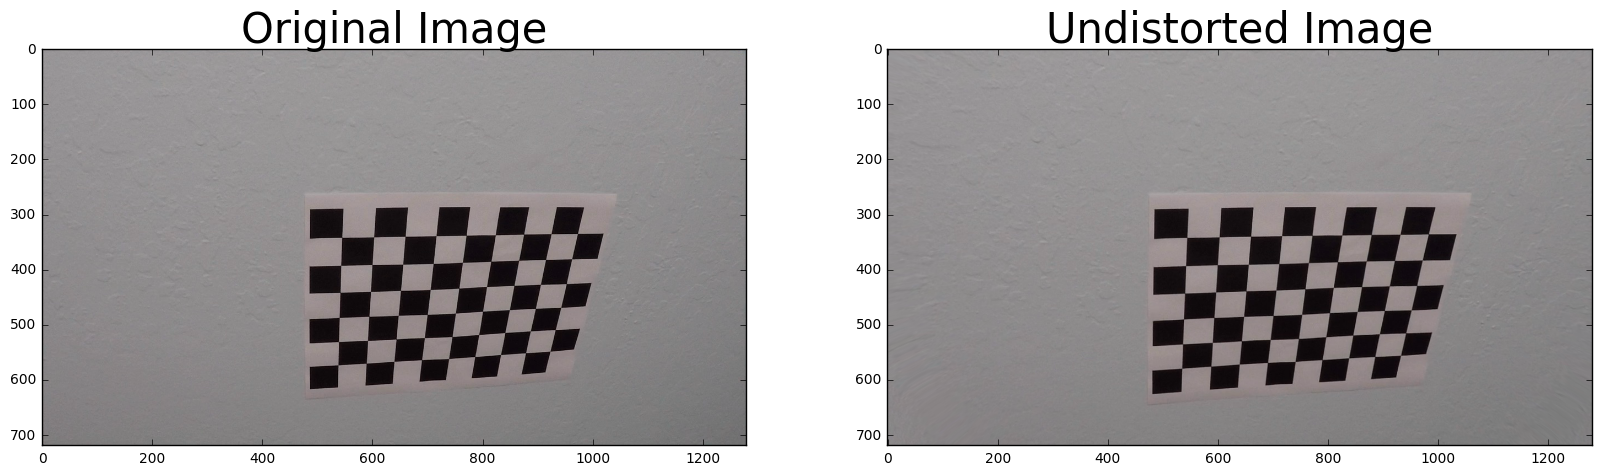

In [34]:
#
## Save our distortion data
#
import pickle

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open(cbase+"calibration.p", "wb" ))

#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

Here are 8 of our test images from 8 available.


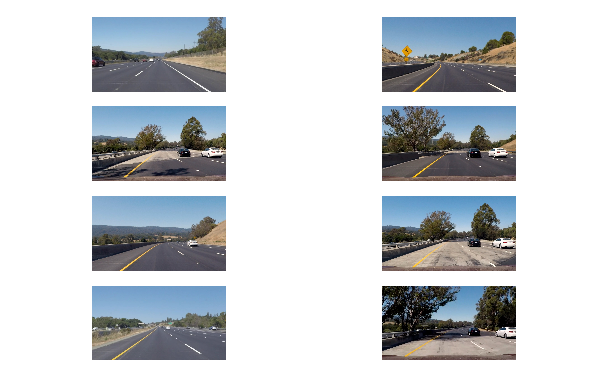

In [35]:
## Showcase our test images

print("Here are 8 of our test images from {} available.".format(len(data['test'])))
test_samples = random.sample(data['test'],8)
fig = plt.figure()
plt.axis('off')
fig.tight_layout()
for i in range(0, 2):
    for j in range(0, 4):
        n = i*4+j
        ax = fig.add_subplot(4, 2, n+1)
        plt.axis('off')
        plt.imshow(mpimg.imread(test_samples[n]))

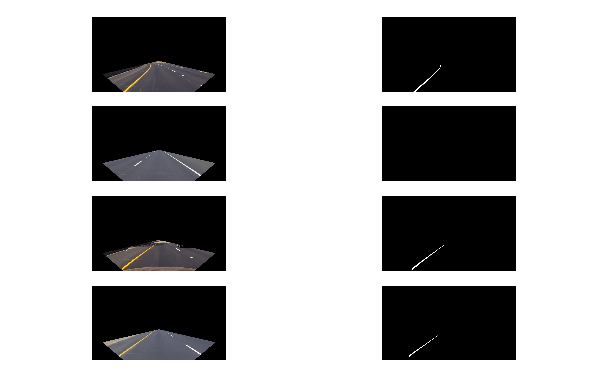

In [36]:
# 
# Here's a key trick - shift to HSV (hue, saturation, value)
# then apply color masks.
#

def yellow_mask(rgb):
    hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
    lower  = np.array([ 0, 80, 200])
    upper = np.array([ 40, 255, 255])
    mask = np.array(cv2.inRange(hsv, lower, upper))
    #print("mask is ", mask.shape)
    mask[mask > 0] = 1
    return mask
 
# Run the function
fig = plt.figure()
plt.axis('off')
fig.tight_layout()
images = random.sample(test_samples, 4)
for i in range(0,4):
    raw = cv2.imread(images[i])
    raw = cv2.resize(raw, (1280, 720), interpolation = cv2.INTER_CUBIC)
    image = cv2.undistort(raw, mtx, dist, None, mtx)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    fig.add_subplot(4, 2, i*2+1)
    plt.axis('off')
    plt.imshow(lane_region(image))
    fig.add_subplot(4, 2, i*2+2)
    plt.axis('off')
    plt.imshow(lane_region(yellow_mask(image)), cmap='gray')

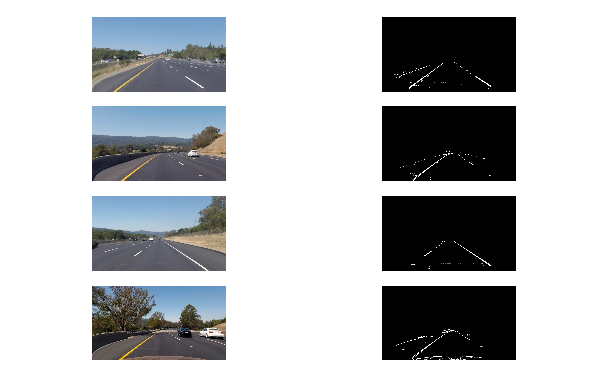

In [37]:
#
# Now try a white mask
#

def white_mask(rgb):
    # expects image in rgb
    yuv = cv2.cvtColor(rgb, cv2.COLOR_RGB2YUV)
    y = yuv[:,:,0]
    mask = np.zeros_like(y)
    bits = np.where(y  > 100)  # was 175
    mask[bits] = 1
    kernel = np.ones((11,11),np.float32)/(1-11*11)
    kernel[5,5] = 1.0
    mask2 = cv2.filter2D(y,-1,kernel)
    mask[mask2 < 5] = 0
    return mask

# Run the function
fig = plt.figure()
plt.axis('off')
fig.tight_layout()
images = random.sample(test_samples, 4)
for i in range(0,4):
    raw = cv2.imread(images[i])
    raw = cv2.resize(raw, (1280, 720), interpolation = cv2.INTER_CUBIC)
    image = cv2.undistort(raw, mtx, dist, None, mtx)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    fig.add_subplot(4, 2, i*2+1)
    plt.axis('off')
    plt.imshow(rgb)
    fig.add_subplot(4, 2, i*2+2)
    plt.axis('off')
    plt.imshow(lane_region(white_mask(rgb)), cmap='gray')

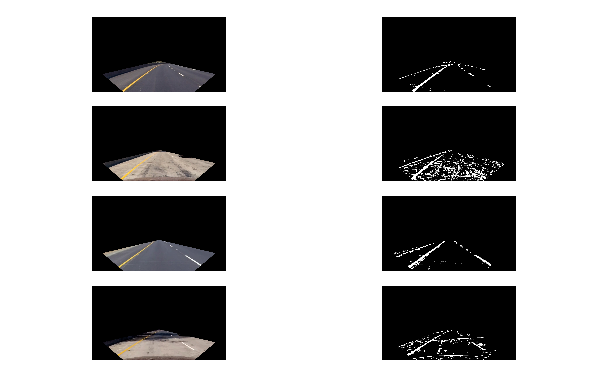

In [38]:
#
# Define a filter to find lines in an image,
# combining Sobel and color filters.  Test it
# on an image.
#

# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
def abs_sobel_thresh(gray, orient='x', thresh_min=20, thresh_max=100):
    sobel = cv2.Sobel(gray, cv2.CV_64F, (orient=='x'), (orient=='y'))
    abs_sobel = np.absolute(sobel)
    max_sobel = max(1,np.max(abs_sobel))
    scaled_sobel = np.uint8(255*abs_sobel/max_sobel)
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    return binary_output

def lane_threshold(rgb):
    # Combine sobel & hls filters, then OR them together.
    #hls = cv2.GaussianBlur(hls, (5,5), 0)
    white = white_mask(rgb)
    yellow = yellow_mask(rgb)
    green = abs_sobel_thresh(rgb[:,:,2])
    gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
    shadows = abs_sobel_thresh(gray, orient='x', thresh_min=10, thresh_max=64)
    return yellow | white | green | shadows

# Run the function
fig = plt.figure()
plt.axis('off')
fig.tight_layout()
images = test_samples[4:8]
for i in range(0,4):
    raw = cv2.imread(images[i])
    raw = cv2.resize(raw, (1280, 720), interpolation = cv2.INTER_CUBIC)
    image = cv2.undistort(raw, mtx, dist, None, mtx)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    grad_binary = lane_threshold(rgb)
    
    fig.add_subplot(4, 2, i*2+1)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(lane_region(image), cv2.COLOR_BGR2RGB))
    fig.add_subplot(4, 2, i*2+2)
    plt.axis('off')
    plt.imshow(lane_region(grad_binary), cmap='gray')

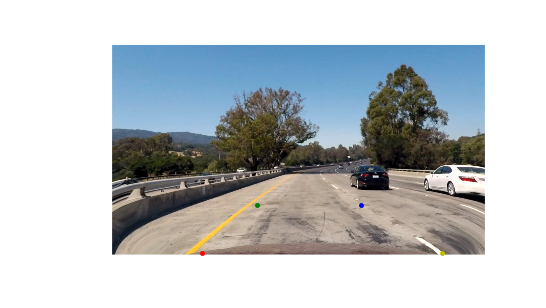

In [39]:
# 
# Perspective transform
#

# Let's test our coordinates and make sure
# we've chosen a trapezoid in the right order for
# our transformation function, which needs
# (tl, tr, br, bl) order.

src = np.float32(((720, 305), (552, 500), (552, 856), (720, 1176)))

#ifile = "../CarND-Advanced-Lane-Lines/test_images/test2.jpg"
ifile = "../CarND-Advanced-Lane-Lines/test_images/test1.jpg"
#ifile = "./movies/frame600.jpg"
#ifile = "./movies/frame14.jpg"
#ifile = "./movies/frame67.jpg"
#ifile = "../CarND-Advanced-Lane-Lines/test_images/solidWhiteRight.jpg"

raw = cv2.imread(ifile)
raw = cv2.resize(raw,(1280, 720), interpolation = cv2.INTER_CUBIC)

image = cv2.undistort(raw, mtx, dist, None, mtx)
raw = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#img = correct_image(raw.copy())
img = raw
plt.axis('off')
plt.imshow(img)
plt.plot(500, 548, '.g') #top left
plt.plot(858, 548, '.b') #top right
plt.plot(1138, 712, '.y') #bottom.right
plt.plot(312, 712, '.r') #bottom left


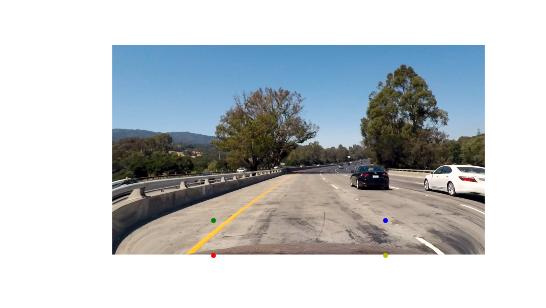

In [40]:
#
# Ok that looks good, lets record it as our source src and find a rectangle for
# the destination and test it here.

src = np.float32(((500, 548), (858, 548), (1138, 712), (312, 712)))

plt.axis('off')
plt.imshow(img)
plt.plot(350, 600, '.g') #top left
plt.plot(940, 600, '.b') #top right
plt.plot(940, 720, '.y') #bottom.right
plt.plot(350, 720, '.r') #bottom left

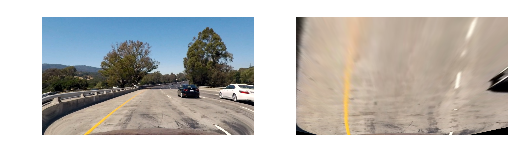

In [41]:
#
# Now both look good.  Record the destination, compute our transform,
# and test it.
#

dst = np.float32(((350, 600), (940, 600), (940, 720), (350, 720)))
M = cv2.getPerspectiveTransform(src, dst)

fig = plt.figure()
fig.add_subplot(2, 2, 1)
plt.axis('off')
plt.imshow(img)

img_size = (img.shape[1], img.shape[0])
warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

fig.add_subplot(2, 2, 2)
plt.axis('off')
plt.imshow(warped)



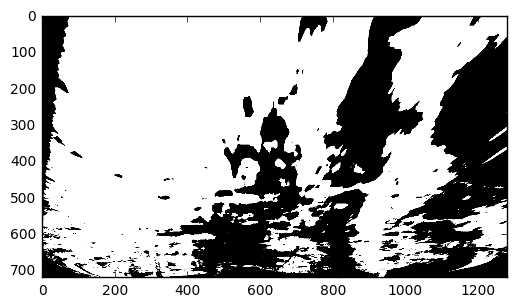

In [42]:
#
# Here we introduce a shadow mask to eliminate
# dark regions caused by occlusions or sun
#

def shadow_mask(img):
    bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    bits = np.zeros_like(bw)
    thresh = np.mean(bw)
    bits[bw > thresh] = 1
    return bits
    #print(bw.shape)
    
shadow_mask(warped)
plt.imshow(shadow_mask(warped), cmap='gray')

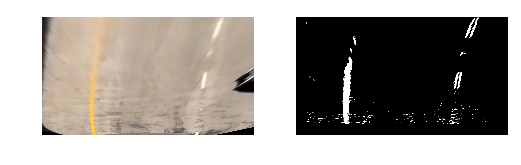

In [43]:
#
# Let's combine all three
#

fig = plt.figure()
fig.add_subplot(1,2,1)
plt.axis('off')
plt.imshow(warped, cmap='gray')

img_size = (img.shape[1], img.shape[0])
warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
lines = clip_bottom(lane_threshold(warped)) & shadow_mask(warped)
fig.add_subplot(1, 2, 2)
plt.axis('off')
plt.imshow(lines, cmap='gray')

(720, 1280)


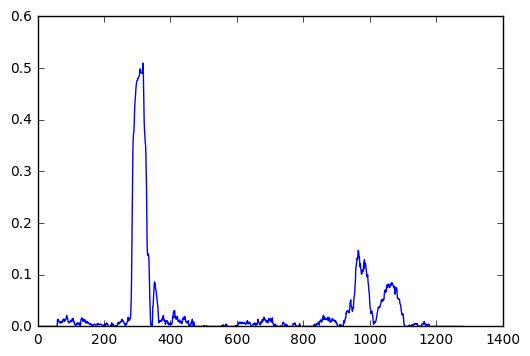

In [44]:
#
# Let's create a histogram of our transformed, edge-detected image
#

n_hist_cutoff = 0
print(lines.shape)
histogram = np.mean(lines[np.int(lines.shape[0]*n_hist_cutoff):,:], axis=0)
plt.plot(histogram)

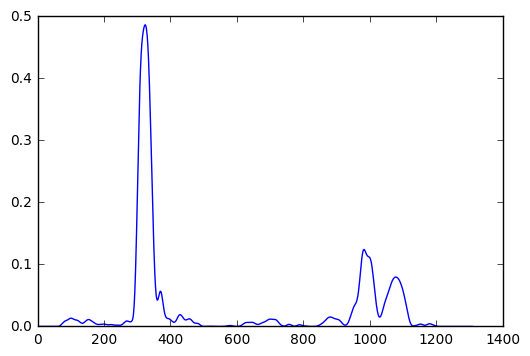

In [45]:
#
# Let's smooth the signal using 1D convolutions
#

def smooth(x, window_len=32):
    w = np.hanning(window_len)
    s = np.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    return np.convolve(w/w.sum(),s,mode='valid')

clean = smooth(histogram)
plt.plot(clean)

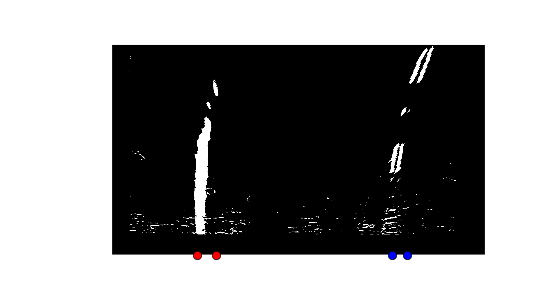

In [46]:
#
# Take the mean, std deviation on the left,
# then the mean, std deviation on the right
#
# Overlay these points on our image
#
import matplotlib.patches as patches

M_inv = cv2.getPerspectiveTransform(dst, src)

def peak_window(h, idx):
    lo = idx
    hi = idx
    while lo > 0 and h[lo] > 0.05:
        lo += -1
    while hi < len(h) and h[hi] > 0.05:
        hi += 1
    return lo, hi

def lane_boundaries(h):
    midpoint = int(len(h)/2)
    l_lo, l_hi = peak_window(h, np.argmax(h[0:midpoint]))
    r_lo, r_hi = peak_window(h, midpoint+np.argmax(h[midpoint:]))
    return l_lo, l_hi, r_lo, r_hi

fig1 = plt.figure()
ax = fig.add_subplot(111)
plt.axis('off')
plt.imshow(lines, cmap='gray')
l_lo, l_hi, r_lo, r_hi = lane_boundaries(clean)
plt.plot(l_lo, 720, 'or') #midpoint left
plt.plot(l_hi, 720, 'or') #midpoint left
plt.plot(r_lo, 720, 'ob') #midpoint right
plt.plot(r_hi, 720, 'ob') #midpoint right


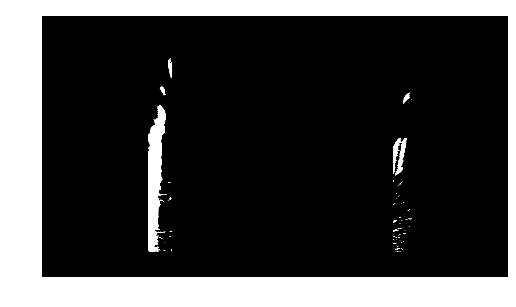

In [47]:
#
# Let's do a sliding window and see what points we get
#

def sliding_window(src, dst, l_lo, l_hi, r_lo, r_hi):
    dst[:,l_lo:l_hi] = src[:,l_lo:l_hi]
    dst[:,r_lo:r_hi] = src[:,r_lo:r_hi]

bits = np.zeros_like(lines)
sliding_window(lines, bits, l_lo, l_hi, r_lo, r_hi)
plt.axis('off')
plt.imshow(bits, cmap='gray')

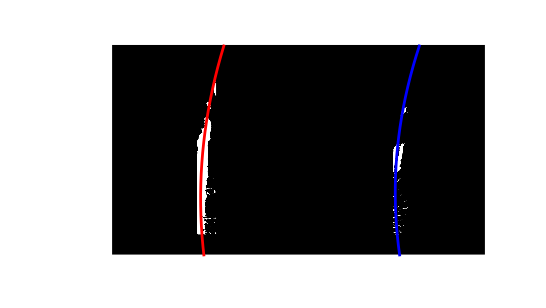

In [48]:
#
# Let's fit a line to left and right pixels
#

def fit_line_to_sliding_y(img, l_lo, l_hi, r_lo, r_hi):
    clean = np.zeros_like(img)
    mid = int(clean.shape[1]/2)
    sliding_window(img, clean, l_lo, l_hi, r_lo, r_hi)
    x_l, y_l = np.where(clean[:,0:mid] == 1)
    x_r, y_r = np.where(clean[:,mid:] == 1)
    try:
        fit_fn_l = np.polyfit(x_l, y_l, 2)
    except:
        print("Left fit fail")
        fit_fn_l = None
    try:
        fit_fn_r = np.polyfit(x_r, y_r+mid, 2)
    except:
        print("Right fit fail")
        fit_fn_r = None
    return clean, fit_fn_l, fit_fn_r 

bits, left_fit,right_fit = fit_line_to_sliding_y(lines, l_lo, l_hi, r_lo, r_hi) 

def fit_y(f, y):
    return f[0]*y**2 + f[1]*y + f[2]

yplot = np.arange(0, bits.shape[0])
xplot_l = fit_y(left_fit, yplot) 
xplot_r = fit_y(right_fit, yplot) 

plt.axis('off')
plt.imshow(bits, cmap='gray')

plt.plot(xplot_l, yplot, color='red', linewidth=2)
plt.plot(xplot_r, yplot, color='blue', linewidth=2)


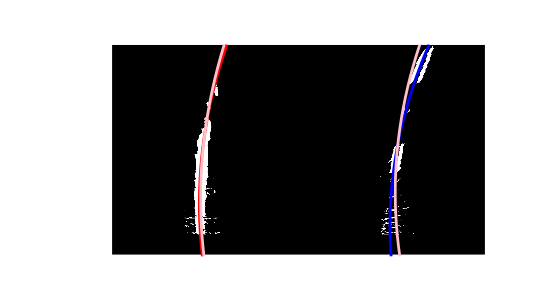

In [49]:
#
# Use our fitted lines as a guide for extracting pixels
# within a window, then fit a line to these pixels.
#
# We will use this when transitioning from one frame to another
# in the video
#

def pixel_fit(src, fit, window=60):
    dst = np.zeros_like(src)
    if fit is None:
        return None, dst, True
    max_x = src.shape[0]-1
    max_y = src.shape[1]-1
    for x in range(max_x, 0, -1):
        y = int(0.5+fit_y(fit, x))
        lo_y = max(0, y-window)
        hi_y = min(max_y, y+window)
        #print("x,y_lo,y_hi = ", x, lo_y, hi_y)
        dst[x,lo_y:hi_y] = src[x,lo_y:hi_y]
        if y >=0 and y < max_y:
            pass
            #dst[x,y] = 1
    x,y = np.where(dst > 0)
    try:
        new_fit = np.polyfit(x, y, 2)
        weak = False
    except:
        weak = True
        print("Weak!")
        new_fit = fit
    return new_fit, dst, weak

p_left_fit, p_left_bits, p_left_weak = pixel_fit(lines, left_fit)
p_right_fit, p_right_bits, p_right_weak = pixel_fit(lines, right_fit)

xplot2_l = fit_y(p_left_fit, yplot) 
xplot2_r = fit_y(p_right_fit, yplot) 
p_bits = p_left_bits | p_right_bits

plt.axis('off')
#plt.imshow(lines, cmap='gray')
plt.imshow(p_bits, cmap='gray')

plt.plot(xplot2_l, yplot, color='red', linewidth=2)
plt.plot(xplot_l, yplot, color='pink', linewidth=2)
plt.plot(xplot2_r, yplot, color='blue', linewidth=2)
plt.plot(xplot_r, yplot, color='pink', linewidth=2)
#
#

In [50]:
#
# Let's compute the curvature of our lines,
# compensating for warping in the image
# and using stock values or pixels to meters as
# shown in the assignment.
#

def fit_to_points(src, fit):
    max_x = src.shape[0]-1
    max_y = src.shape[1]-1
    dx = 30
    pts = []
    for x in range(0, max_x, dx):
        y = int(0.5+fit_y(fit, x))
        if y >= 0 and y < max_y:
            pts.append([x, y])
    return np.array(pts)

def fit_curvature(src, fit):
    if fit is None:
        return np.inf
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meteres per pixel in x dimension
    y_eval = src.shape[1]-1
    pts = fit_to_points(src, fit)
    fit_cr = np.polyfit(pts[:,0]*ym_per_pix, pts[:,1]*xm_per_pix, 2)
    curverad = ((1 + (2*fit_cr[0]*y_eval + fit_cr[1])**2)**1.5) \
                                 /np.absolute(2*fit_cr[0])
    return curverad
    
print("left curve radius: {}m".format(fit_curvature(bits, p_left_fit)))
print("right curve radius: {}m".format(fit_curvature(bits, p_right_fit)))
# Example values: 3380.7 m    3189.3 m

left curve radius: 9445.020990056511m
right curve radius: 10832.676556650042m


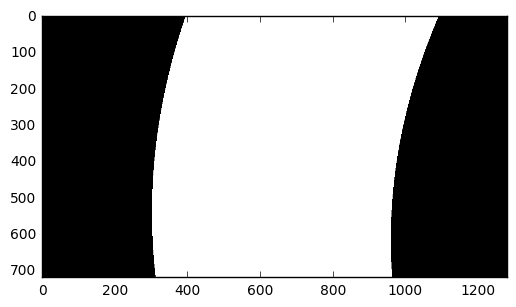

In [51]:
#
# Let's draw our lane
#

lane = np.zeros_like(lines)

def fit_points(y, fit):
    return fit[0]*y**2 + fit[1]*y + fit[2]

x_left = fit_points(yplot, p_left_fit) 
x_right = fit_points(yplot, p_right_fit)
coords = np.indices(bits.shape)
lane[coords[1] >= fit_points(coords[0], p_left_fit)] = 1
lane[coords[1] > fit_points(coords[0], p_right_fit)] = 0

plt.imshow(lane, cmap='gray')
    

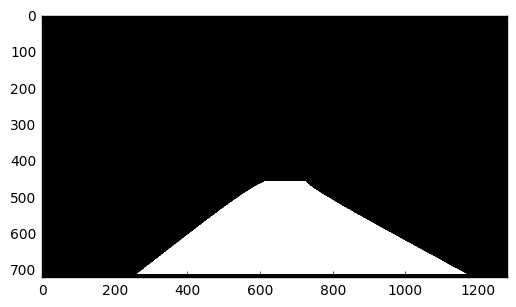

In [52]:
#
# Show our lane as back on our original image
#

M_inv = cv2.getPerspectiveTransform(dst, src)
lane_size = (lane.shape[1], lane.shape[0])
warped_back = cv2.warpPerspective(lane, M_inv, lane_size, flags=cv2.INTER_LINEAR)

plt.imshow(warped_back, cmap='gray')

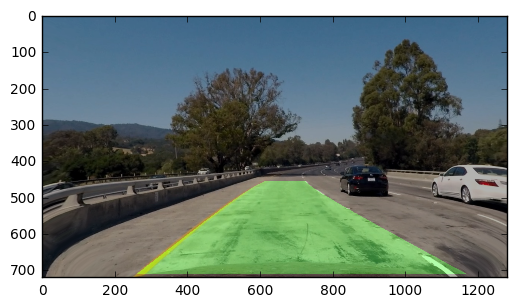

In [53]:
#
# Finally, overlay our road on the original image
#

output = np.zeros_like(img)
overlay = np.zeros_like(img)
overlay[:,:,1] = warped_back*255
alpha = 0.3
cv2.addWeighted(overlay, alpha, img, 1 - alpha, 0, output)
plt.imshow(output)

In [54]:
#
# Put the pipeline together
#

#
# Variables
#  mtx = matrix from camera distortion
#  dist = from camera distortion
#  M = perspective transformation
#  M_inv = inverse prospective tranformation

n_inches_per_lane = 12*12

def scale_ok(scale):
    #print("Testing scale ", scale)
    return (scale is not None) and scale > 3.5 and scale < 7.0

def wheres_my_lane(img_shape, left_fit, right_fit):
    left_marker = None
    right_marker = None
    scale = None
    off_center = None
    lane_size_pixels = None
    y = img_shape[1] 
    max_x = img_shape[0]
    if left_fit is not None:
        left_marker = fit_points(y, left_fit) 
    if right_fit is not None:
        right_marker = fit_points(y, right_fit)
    #print("Markers [{}, {}]".format(left_marker,right_marker))
    if left_marker is not None and right_marker is not None:
        lane_size_pixels = max(2,right_marker - left_marker)
        centered_left = (max_x - lane_size_pixels)*0.5
        off_center = (centered_left - left_marker)/lane_size_pixels
        off_center = n_inches_per_lane*off_center
        scale = lane_size_pixels / n_inches_per_lane
        
    ok = (left_fit is not None)
    ok = ok and (right_fit is not None)
    ok = ok and scale_ok(scale)
    #ok = ok and lane_fit_ok(left_fit, right_fit)
    return {'ok': ok,
            'left': left_marker, 
            'right': right_marker, 
            'lane_pixels': lane_size_pixels,
            'off_center': off_center,
            'left_fit': left_fit,
            'left_curve': None,
            'left_right': None,
            'right_fit': right_fit,
            'scale': scale}

def correct_image(img):
    # create a CLAHE object (Arguments are optional).
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    blue = clahe.apply(img[:,:,0])
    green = clahe.apply(img[:,:,1])
    red = clahe.apply(img[:,:,2])
    img[:,:,0] = blue
    img[:,:,1] = green
    img[:,:,2] = red
    return img

def fit_ok(new_fit, old_fit, threshold=0.05):
    if new_fit is None and old_fit is not None:
        return True
    if new_fit is not None and old_fit is None:
        return True
    return np.all(np.array(np.abs((new_fit-old_fit)/old_fit)) <= threshold)

def sob(plane,n=0):
    sobelized = abs_sobel_thresh(plane)
    rgb = np.zeros((plane.shape[0], plane.shape[1], 3), dtype=np.float32)
    rgb[:,:,n] = sobelized*255
    return rgb

def create_mosaic(info, frame):
    # middle panel text example
    # using cv2 for drawing text in diagnostic pipeline.
    font = cv2.FONT_HERSHEY_COMPLEX
    middlepanel = np.zeros((120, 1280, 3), dtype=np.uint8)
    s = info['scale']
    if s is None:
        s = 0
    lc = info['left_curve']
    rc = info['right_curve']
    scale = 'Frame {} scale {:.4f} curve {:.0f},{:.0f}'.format(frame,s,lc,rc)
    cv2.putText(middlepanel, scale, (30, 60), font, 1, (255,0,0), 2)
    offc = info['off_center']
    if offc is None:
        offc = 0
    off = 'Inches to right of center: {:.4f}'.format(offc)
    cv2.putText(middlepanel, off, (30, 90), font, 1, (255,0,0), 2)
    # assemble the screen example
    diagScreen = np.zeros((1080, 1920, 3), dtype=np.uint8)
    raw, diag1, diag2, diag3, diag4, diag5, diag6 = info['diags']
    #print("main",mainDiagScreen.shape)
    diagScreen[0:720, 0:1280] = diag6
    diagScreen[720:840, 0:1280] = middlepanel
    diagScreen[840:1080, 0:320] = cv2.resize(raw, (320,240), interpolation=cv2.INTER_AREA)
    diagScreen[840:1080, 320:640] = cv2.resize(diag1, (320,240), interpolation=cv2.INTER_AREA)
    diagScreen[840:1080, 640:960] = cv2.resize(diag2, (320,240), interpolation=cv2.INTER_AREA)
    diagScreen[840:1080, 960:1280] = cv2.resize(diag3, (320,240), interpolation=cv2.INTER_AREA)
    diagScreen[840:1080, 1280:1600] = cv2.resize(diag4, (320,240), interpolation=cv2.INTER_AREA)
    diagScreen[840:1080, 1600:1920] = cv2.resize(diag5, (320,240), interpolation=cv2.INTER_AREA)
    
    diagScreen[0:240, 1280:1600] = cv2.resize(sob(raw[:,:,0],0), (320, 240), 
                                              interpolation=cv2.INTER_AREA)
    diagScreen[240:480, 1280:1600] = cv2.resize(sob(raw[:,:,1],1), (320, 240), 
                                              interpolation=cv2.INTER_AREA)
    diagScreen[480:720, 1280:1600] = cv2.resize(sob(raw[:,:,2],2), (320, 240), 
                                              interpolation=cv2.INTER_AREA)
    
    hls = cv2.cvtColor(raw, cv2.COLOR_RGB2HLS)
    diagScreen[0:240, 1600:1920] = cv2.resize(bw(hls[:,:,0]), (320, 240), 
                                              interpolation=cv2.INTER_AREA)
    diagScreen[240:480, 1600:1920] = cv2.resize(bw(hls[:,:,1]), (320, 240), 
                                              interpolation=cv2.INTER_AREA)
    diagScreen[480:720, 1600:1920] = cv2.resize(bw(hls[:,:,2]), (320, 240), 
                                              interpolation=cv2.INTER_AREA)
    
    result = cv2.resize(diagScreen, (1280,720), interpolation=cv2.INTER_AREA)
    
    return result

#create_mosaic(['foo'])

def bw(plane):
    bw = np.zeros((plane.shape[0], plane.shape[1], 3), dtype=np.float32)
    ramped = plane
    bw[:,:,0] = ramped
    bw[:,:,1] = ramped
    bw[:,:,2] = ramped
    return bw

n_fits = 10
dfit_threshold = (5.0,100.0)

left_fits = [] 
def left_moving_average(fit):
    global left_fits, n_fits
    while len(left_fits) > n_fits:
        left_fits = left_fits[1:]
    if fit is not None:
        if len(left_fits) > 0:
            df = dfit(fit, left_fits[-1])
            if df > dfit_threshold[0] and df < dfit_threshold[1]:
                #print("dfit_l ", dfit(fit, left_fits[-1]))
                return left_fits[-1]
        left_fits.append(fit) 
    if len(left_fits):
        return np.mean(np.array(left_fits), axis=0)
    return None

def dfit(f1, f2):
    raw = np.abs((f1-f2)/f2)
    #print("df ", raw)
    return np.mean(raw)

right_fits = []
def right_moving_average(fit):
    global right_fits, n_fits
    while len(right_fits) > n_fits:
        right_fits = right_fits[1:]
    if fit is not None:
        # gak we need a push function
        if len(right_fits) > 0:
            df = dfit(fit, right_fits[-1])
            if df > dfit_threshold[0] and df < dfit_threshold[1]:
                #print("dfit_r ", dfit(fit, right_fits[-1]))
                return right_fits[-1]
        right_fits.append(fit) 
    if len(right_fits):
        return np.mean(right_fits, axis=0)
    return None

fill_kernel = np.ones((5,5),np.uint8)

def process(img, 
            current_left = None, 
            current_right = None, 
            left_curve = None,
            right_curve = None,
            dcurve = 1e6,
            frame = 1):  
    diags = [img]
    #
    # img is an RGB image that has been corrected for camera distortion
    #
    
    # First, corrected image
    amped = correct_image(img.copy())
    #amped = img
    diags.append(amped) #1
    
    # Get a birds eye view of road
    warped_size = (amped.shape[1], amped.shape[0])
    warped = cv2.warpPerspective(amped, M, warped_size, flags=cv2.INTER_LINEAR)
    diags.append(warped) #2
    
    # Detect candidate lines on our road using a combination
    # of filters, then just look at our focus area.
    edges = clip_bottom(lane_threshold(warped)) & shadow_mask(warped)
    
    #
    # Compute histogram along vertical stripes, in search of lines.
    # Smooth them a bit then take the peaks as line centers.
    #
    histogram = np.mean(edges[np.int(edges.shape[0]*n_hist_cutoff):,:], axis=0)
    clean = smooth(histogram)
 
    # 
    # create a chart that overlays the histogram on our
    # candidate lane lines for debugging and analysis
    #
    chart = bw(edges*255)
    max_x = int(chart.shape[0]*0.9)
    x_scalar = float(max_x*0.8/max(1,np.max(clean)))
    y_scalar = float(chart.shape[1]-1)/len(clean)
    pts = []
    for i in range(0,len(clean)):
        ix = max_x-int(x_scalar*clean[i])
        iy = int(y_scalar*i)
        pts.append((iy,ix))
    pts = sorted(pts)
    for i in range(1,len(pts)):
        cv2.line(chart, pts[i-1], pts[i], (255, 0, 0), 5)
    diags.append(chart) #3
    
    #
    # extract pixels using a sliding window,
    # then pixels from the first curve,
    # then a moving average whenever
    # we run into a dead zone
    #
    if current_left is None or current_right is None:
        l_lo, l_hi, r_lo, r_hi = lane_boundaries(clean)
        bits, left_fit, right_fit = fit_line_to_sliding_y(edges, l_lo, l_hi, r_lo, r_hi)
    else:
        left_fit = current_left
        right_fit = current_right
    
    #
    # use pixels for a more accurate fit
    #
    p_left_fit, bits_l, weak_l = pixel_fit(edges, left_fit)
    p_right_fit, bits_r, weak_r = pixel_fit(edges, right_fit)
    
    # Now the moving average to smooth out kinks
    left_fit = left_moving_average(p_left_fit)
    right_fit = right_moving_average(p_right_fit)
    bits = bits_l | bits_r
    diag = bw(bits*255)
    diags.append(diag) #4 
    
    # default
    if left_fit is None:
        left_fit = current_left
    if right_fit is None:
        right_fit = current_right
    
    #
    # Compute curvature, then clip outliers
    #
    lc = fit_curvature(edges, left_fit)
    if False and left_curve is not None and lc != np.inf:
        if abs(lc-left_curve) > dcurve:
            lc = left_curve
            left_fit = current_left
            del left_fits[-1]
            
    rc = fit_curvature(edges, right_fit)
    if False and right_curve is not None and rc != np.inf:
        if abs(rc-right_curve) > dcurve:
            rc = right_curve
            right_curve = current_right
            del right_fits[-1]
    
    #
    # Draw our lane
    #
    lane = np.zeros_like(bits)
    coords = np.indices(lane.shape) # we could do this just once
    lane_stats = wheres_my_lane(warped_size, left_fit, right_fit)
    if (left_fit is not None) and (right_fit is not None):
        lane[coords[1] >= fit_points(coords[0], left_fit)] = 1
        lane[coords[1] > fit_points(coords[0], right_fit)] = 0
    diags.append(bw(lane*255))
    
    if not lane_stats['ok']:
        left_fit = current_left
        right_fit = current_left
    
    # 
    # Warp the lane back from birds-eye to normal view, then overlay it on the
    # original image in green.
    #
    warped_back = cv2.warpPerspective(lane, M_inv, warped_size, flags=cv2.INTER_LINEAR)
    overlay = np.zeros_like(img)
    overlay[:,:,1] = warped_back*255
    output = np.zeros_like(img)
    cv2.addWeighted(overlay, alpha, img, 1 - alpha, 0, output)
    diags.append(output) #6
    
    lane_stats['overlay'] = output
    lane_stats['original'] = img
    lane_stats['diags'] = diags
    lane_stats['lines'] = warped
    lane_stats['left_fit'] = left_fit
    lane_stats['right_fit'] = right_fit
    lane_stats['left_curve'] = lc
    lane_stats['right_curve'] = rc
    
    #lane_stats['prev_lines'] = lines
    
    #print("Saving warped ", warped.shape)
    if True or lane_stats['ok']:
        lane_stats['overlay'] = create_mosaic(lane_stats, frame)
    
    return lane_stats

    

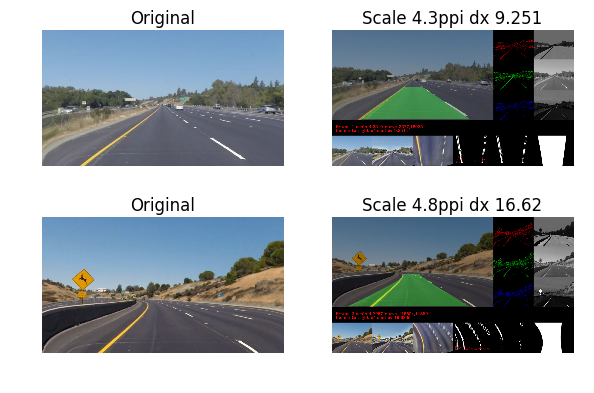

In [55]:
# Run the function
def lane_2x2_figure(paths):
    images = [cv2.imread(p) for p in paths]
    lane_2x2_figure_raw(images)
    
status = None

def init():
    global status, left_fits, right_fits, frame
    status = init_lane_info()
    frame = 0
    left_fits = []
    right_fits = []
    
def init_lane_info():
    return {'ok': False,
            'prev_image': None,
            #'prev_lines': None,
            'lines': None,
            'left': None, 
            'right': None, 
            'lane_pixels': None,
            'off_center': None,
            'left_fit': None,
            'left_curve': None,
            'right_fit': None,
            'right_curve': None,
            'overlay': None,
            'scale': None}

def show_2x2_line(i, fig, image, memory = None, frame=1):
    init()
    if memory:
        lane = process(image, 
                       memory['left_fit'], 
                       memory['right_fit'], 
                       #memory['prev_lines'],
                       frame=frame)
    else:
        lane = process(image, frame=frame)
    out = lane['overlay']
    fig.add_subplot(2, 2, i*2+1)
    plt.axis('off')
    plt.imshow(image)
    plt.title('Original')
    fig.add_subplot(2, 2, i*2+2)
    plt.axis('off')
    plt.imshow(out)
    if not lane['ok']:
        err=':('
        if lane['left_fit'] is None:
            err += ' No left'
        if lane['right_fit'] is None:
            err += ' No right'
        if not scale_ok(lane['scale']):
            err += ' Bad size'
        plt.title(err)
    else:
        plt.title('Scale {:.2}ppi dx {:.4}'.format(
                lane['scale'], lane['off_center'])) 
    return lane
    
def lane_2x2_figure_raw(images):
    fig = plt.figure()
    plt.axis('off')
    fig.tight_layout()
    for i in range(0,2):
        raw = images[i]
        raw = cv2.resize(raw, (1280, 720), interpolation = cv2.INTER_CUBIC)

        rgb = cv2.cvtColor(raw, cv2.COLOR_BGR2RGB)
        image = cv2.undistort(rgb, mtx, dist, None, mtx)
        show_2x2_line(i, fig, image, frame=i+1)
        

lane_2x2_figure(random.sample(test_samples, 2))

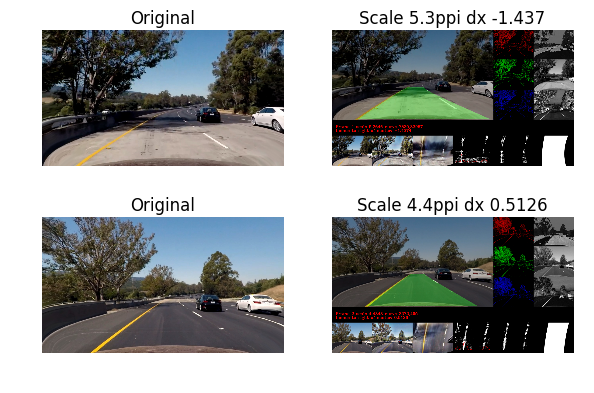

In [56]:
lane_2x2_figure(random.sample(test_samples, 2))

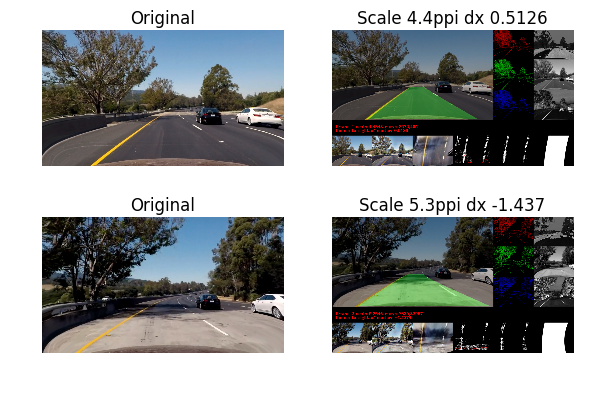

In [57]:
lane_2x2_figure(random.sample(test_samples, 2))

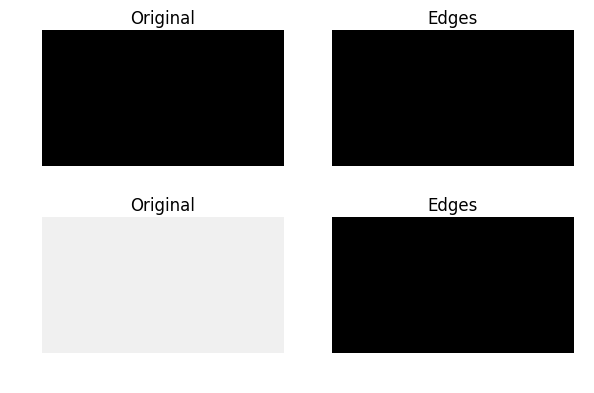

In [58]:
#
# Lets augment and see what happens - should see no edges
#

blackout = np.zeros_like(img)
whiteout = np.zeros_like(img)
whiteout.fill(240)

fig = plt.figure()
plt.axis('off')
fig.tight_layout()
for idx, img in enumerate([blackout, whiteout]):
    lanes = lane_threshold(img)
    lane_size = (img.shape[1], img.shape[0])
    warped = cv2.warpPerspective(lanes, M, lane_size, flags=cv2.INTER_LINEAR)
    fig.add_subplot(2,2,idx*2+1)
    plt.axis('off')
    plt.title('Original')
    plt.imshow(img)
    fig.add_subplot(2,2,idx*2+2)
    plt.axis('off')
    plt.title('Edges')
    plt.imshow(lanes, cmap='gray')


Left fit fail
Right fit fail
Left fit fail
Right fit fail


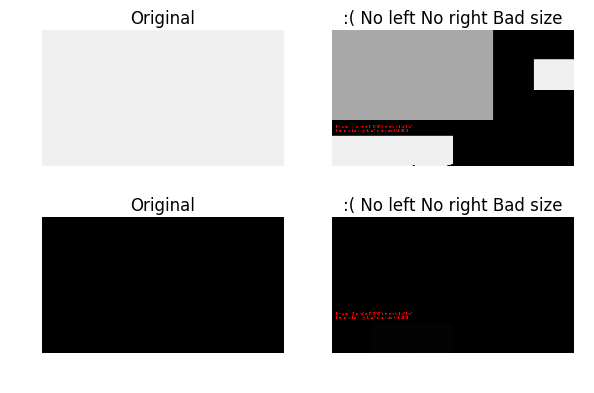

In [59]:
#
# Let's see what we get for lanes 
#

lane_2x2_figure_raw([whiteout, blackout])

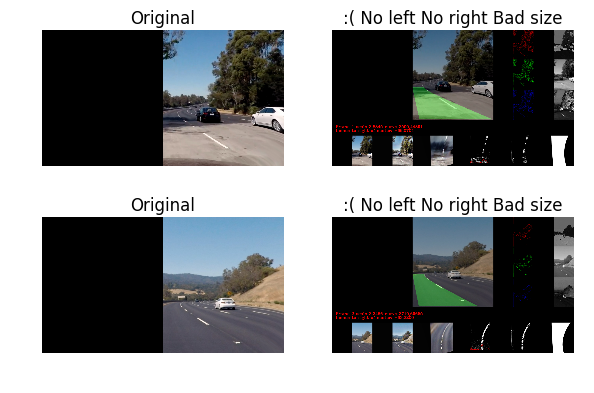

In [60]:
#
# Let's block out the left
#

raw = [cv2.imread(p) for p in random.sample(test_samples,2)]
for img in raw:
    img[:,0:int(img.shape[1]/2),:] = 0
    
lane_2x2_figure_raw(raw)



Right fit fail
Right fit fail


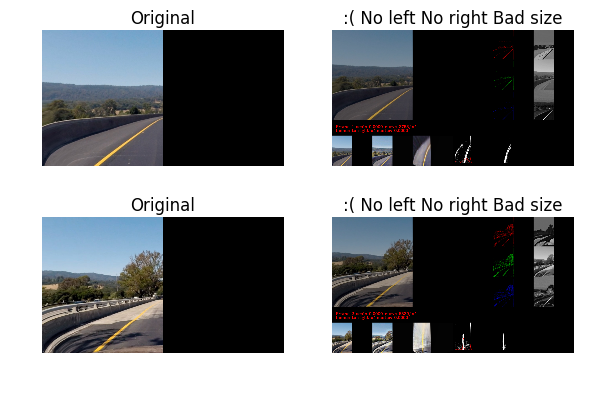

In [61]:
#
# Let's block out the right
#

raw = [cv2.imread(p) for p in random.sample(test_samples,2)]
for img in raw:
    img[:,int(img.shape[1]/2):,:] = 0
    
lane_2x2_figure_raw(raw)

Weak!
Weak!


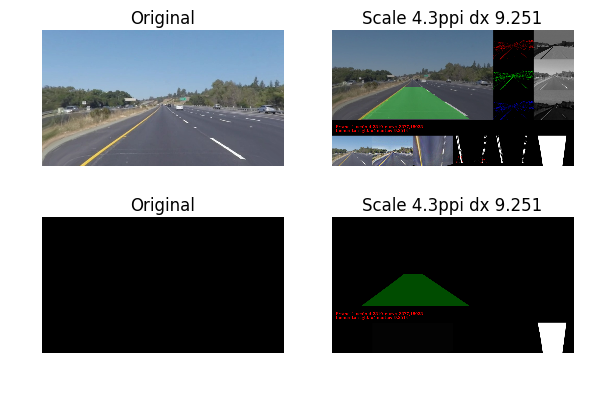

In [62]:
#
# Let's process a good image, then keep the data,
# feed defaults into the processing of a bad image,
# and see if the lanes map from the first image to the
# next one.
#

raw = cv2.imread(random.choice(test_samples))
raw =[cv2.resize(raw, (1280, 720), interpolation = cv2.INTER_CUBIC)]
raw.append(np.zeros_like(raw[0]))

def lane_2x2_with_memory(images):
    memory = init_lane_info()
    fig = plt.figure()
    plt.axis('off')
    fig.tight_layout()
    for idx, img in enumerate(images):
        rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image = cv2.undistort(rgb, mtx, dist, None, mtx)
        attempt = show_2x2_line(idx, fig, image, memory)
        if attempt['ok']:
            memory = attempt

lane_2x2_with_memory(raw)


In [63]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
    
def anneal(img1,img2):
    # average the values of two images
    return cv2.addWeighted(img1,0.05,img2,0.95,0)
    
def process_image(image):
    global status, left_fits, right_fits, frame
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image with lines are drawn on lanes)
    frame += 1
    if status['prev_image'] is not None:
        image = anneal(image, status['prev_image'])
    #print("Image ",image.shape)
    attempt = process(image, 
                      status['left_fit'], 
                      status['right_fit'], 
                      left_curve = status['left_curve'],
                      right_curve = status['right_curve'],
                      frame=frame)
    write_name = "./movies/frame{}.jpg".format(frame)
    bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    cv2.imwrite(write_name, bgr)
    if attempt['ok']:
        status = attempt
        output = status['overlay']
    else:
        output = image
        if status['overlay'] is not None:
            output = status['overlay']
        err=':('
        if attempt['left_fit'] is None:
            err += ' No left'
        if attempt['right_fit'] is None:
            err += ' No right'
        if not scale_ok(attempt['scale']):
            err += ' Bad size {}'.format(attempt['scale'])
        print(err)
    status['prev_image'] = image
    #status['prev_lines'] = attempt['prev_lines']
    return output


In [65]:
print("Starting movie")
test_output = './movies/project.mp4'
test_input = '../CarND-Advanced-Lane-Lines/project_video.mp4'
clip1 = VideoFileClip(test_input)
init()
test_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
test_clip.write_videofile(test_output, audio=False)

Starting movie
[MoviePy] >>>> Building video ./movies/project.mp4
[MoviePy] Writing video ./movies/project.mp4



100%|█████████▉| 1260/1261 [13:52<00:00,  1.98it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./movies/project.mp4 

